# Data Visualization

## Preliminaries

Import Dependencies

In [15]:
import pandas as pd
import geopandas as gpd
import pyproj
import numpy as np
from matplotlib import pyplot as plt

Set Province

In [2]:
province = "Catanduanes"

Load Results

In [3]:
file = f'../04_results/{province}/01_spatiotemporal/{province}_results.csv'

results = pd.read_csv(file, index_col="Unnamed: 0")

results.head()

,PSGC,Municipality,idarea,Date,n,exp,base,typeI,typeII,typeIII,typeIV
1,502001000,Bagamanoc,1,2021-01-01,0,2.457164,0.231385,0.145892,0.059588,0.231241,0.231346
2,502001000,Bagamanoc,1,2021-01-02,0,2.457164,0.222170,0.142024,0.056763,0.222042,0.221991
3,502001000,Bagamanoc,1,2021-01-03,0,2.457164,0.204557,0.134770,0.046784,0.204462,0.204377
4,502001000,Bagamanoc,1,2021-01-04,0,2.457164,0.191733,0.128849,0.040371,0.191646,0.191609
5,502001000,Bagamanoc,1,2021-01-05,0,2.457164,0.181555,0.123715,0.045876,0.181486,0.181473


## Plot All Results as Line Graph

In [4]:
df_results = results[['PSGC', 'Municipality', 'Date', 'typeII', 'n']]
df_results.head()

,PSGC,Municipality,Date,typeII,n
1,502001000,Bagamanoc,2021-01-01,0.059588,0
2,502001000,Bagamanoc,2021-01-02,0.056763,0
3,502001000,Bagamanoc,2021-01-03,0.046784,0
4,502001000,Bagamanoc,2021-01-04,0.040371,0
5,502001000,Bagamanoc,2021-01-05,0.045876,0


In [12]:
df2 = df_results[df_results['Municipality'] == 'San Andres']

df2[df2['typeII'] == df2['typeII'].max()]

,PSGC,Municipality,Date,typeII,n
5414,502008000,San Andres,2021-10-31,8.148233,72


In [22]:
df2 = df_results[df_results['Municipality'] == 'Panganiban']
df2[df2['typeII'] == df2['typeII'].max()]

,PSGC,Municipality,Date,typeII,n
4775,502007000,Panganiban,2022-01-30,6.62215,16


In [23]:
df2 = df_results[df_results['Municipality'] == 'Baras']
df2[df2['Date'] == '2022-08-11']

,PSGC,Municipality,Date,typeII,n
1318,502002000,Baras,2022-08-11,4.065069,13


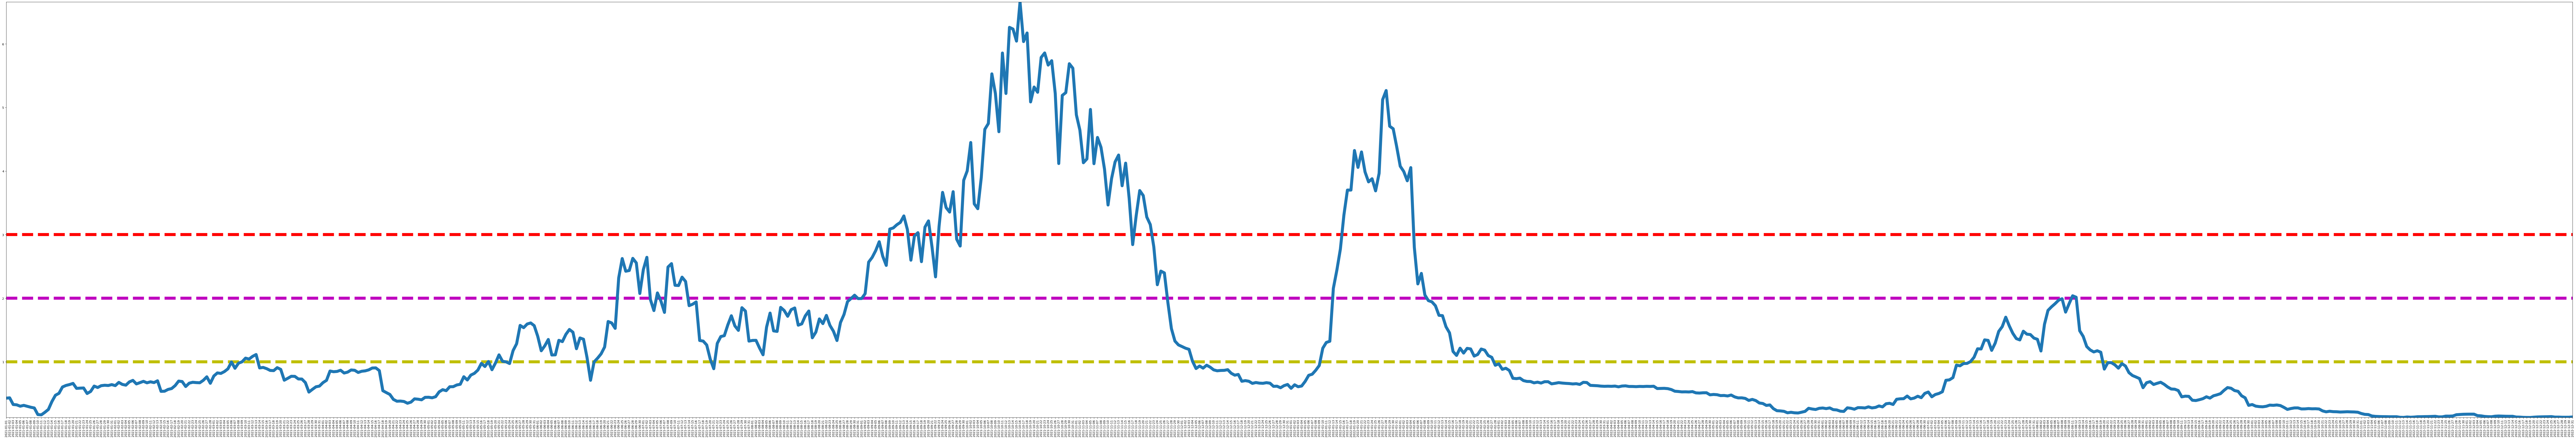

In [ ]:
df_test = df_results[df_results['Municipality'] == "Virac "]

plt.figure(figsize=(120,20))
plt.xticks(rotation=90)
plt.tight_layout()
plt.margins(0,0)
plt.rcParams.update({'font.size': 10})

plt.axhline(y=1, color='y', linestyle='--', linewidth=10)
plt.axhline(y=2, color='m', linestyle='--', linewidth=10)
plt.axhline(y=3, color='r', linestyle='--', linewidth=10)

plt.plot(df_test['Date'], df_test['typeII'], linestyle='-', linewidth=10)


C:\Users\diana\AppData\Local\Temp\ipykernel_7652\4212648180.py:28: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


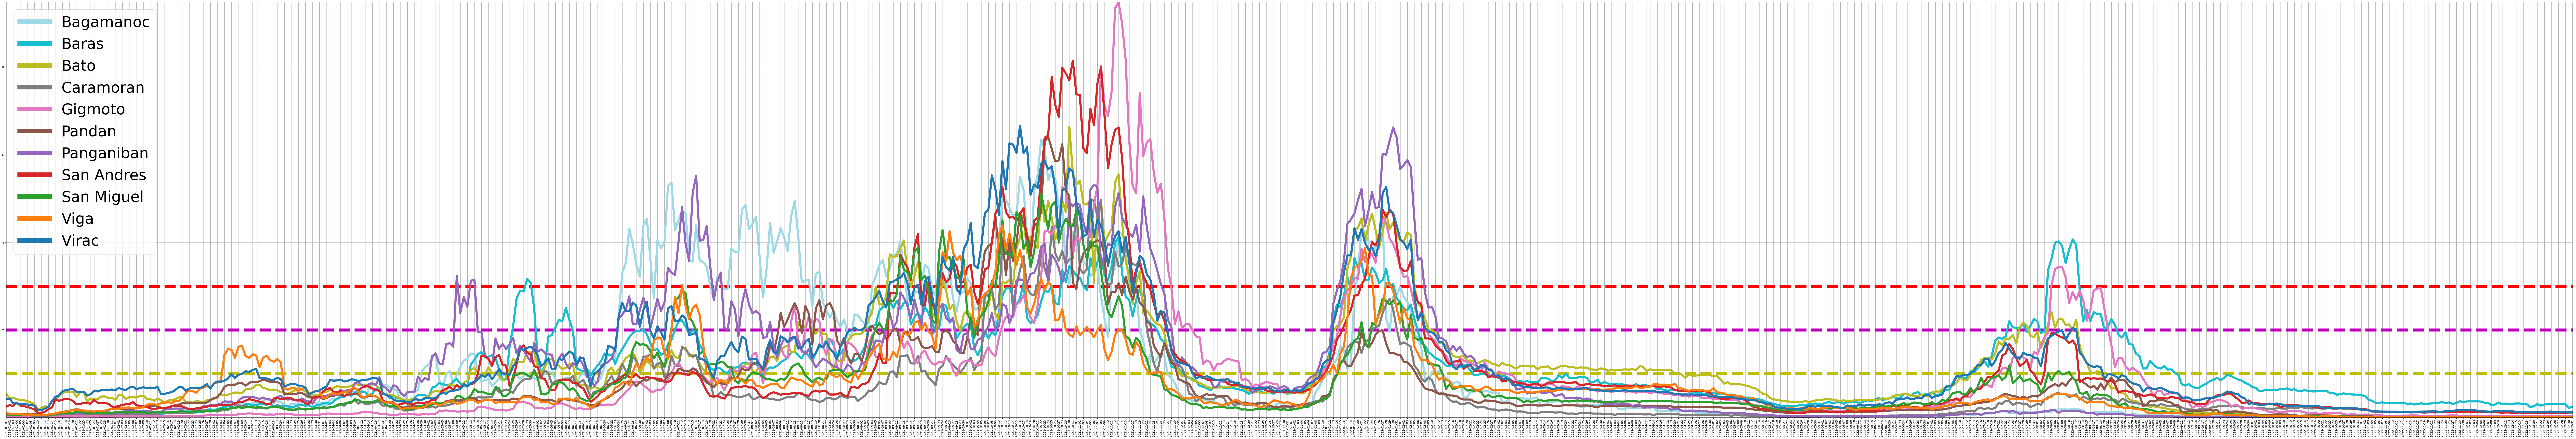

In [20]:
mun_codes = df_results['PSGC'].unique().tolist()

plt.figure(figsize=(120,20))
plt.xticks(rotation=90)
plt.tight_layout()
plt.margins(0,0)


# add RR thresholds
plt.axhline(y=1, color='y', linestyle='--', linewidth=10)
plt.axhline(y=2, color='m', linestyle='--', linewidth=10)
plt.axhline(y=3, color='r', linestyle='--', linewidth=10)

# set colors for lines
n = len(mun_codes)
colors = plt.cm.tab20(np.linspace(0,1,n)).tolist()

for code in mun_codes:
    df = df_results[df_results['PSGC'] == code]
    mun = df.iloc[0]['Municipality']

    plt.plot(df['Date'], df['typeII'], linestyle='-', linewidth=7, label=mun, color=colors.pop())


plt.rcParams.update({'font.size': 10})
leg = plt.legend(loc='upper left', prop={'size': 50})

for legobj in leg.legendHandles:
    legobj.set_linewidth(15.0)

plt.grid()
plt.show()

## Create Choropleth Animation

<Axes: >

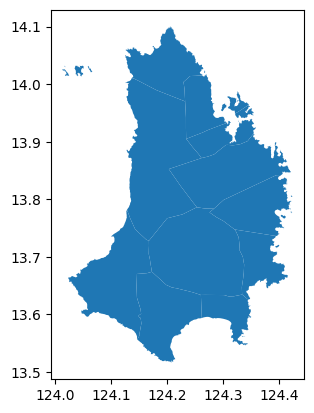

In [ ]:

sf = gpd.read_file("../01_data/00_raw/01_shapefiles/CATANDUANES/CATANDUANES_shapefile.shp")
sf.to_crs(pyproj.CRS.from_epsg(4326), inplace=True)
sf.plot()

In [8]:
sf

,psgc_code,name,corr_code,geo_level,city_class,inc_class,urb_rur,pop_2015,pop_2020,status,adm3_pcode,adm3_en,adm3_alt,adm2_pcode,adm1_pcode,adm0_pcode,shape_len,shape_area,shape_sqkm,geometry
0,502001000,Bagamanoc,52001000.0,Mun,None,None,5th,None,None,None,PH0502001,Bagamanoc,None,PH05020,PH05,PH,0.635232,0.005712,68.287093,"MULTIPOLYGON (((124.26683 14.02121, 124.26778 ..."
1,502002000,Baras,52002000.0,Mun,None,None,5th,None,None,None,PH0502002,Baras,None,PH05020,PH05,PH,0.671479,0.005944,71.143577,"MULTIPOLYGON (((124.39639 13.73633, 124.39639 ..."
2,502003000,Bato,52003000.0,Mun,None,None,5th,None,None,None,PH0502003,Bato,None,PH05020,PH05,PH,0.524716,0.004341,51.970156,"MULTIPOLYGON (((124.34623 13.62613, 124.34621 ..."
3,502004000,Caramoran,52004000.0,Mun,None,None,3rd,None,None,None,PH0502004,Caramoran,None,PH05020,PH05,PH,1.105065,0.023545,281.575736,"MULTIPOLYGON (((124.0474 14.01378, 124.04737 1..."
4,502005000,Gigmoto,52005000.0,Mun,None,None,5th,None,None,None,PH0502005,Gigmoto,None,PH05020,PH05,PH,0.741950,0.008865,106.058791,"MULTIPOLYGON (((124.39639 13.73633, 124.39363 ..."
5,502006000,Pandan,52006000.0,Mun,None,None,4th,None,None,None,PH0502006,Pandan,None,PH05020,PH05,PH,0.666021,0.008877,106.089095,"MULTIPOLYGON (((124.26327 14.01531, 124.25632 ..."
6,502007000,Panganiban,52007000.0,Mun,Payo,None,5th,None,None,None,PH0502007,Panganiban (Payo),Payo,PH05020,PH05,PH,0.684371,0.004232,50.601154,"MULTIPOLYGON (((124.34591 13.96378, 124.34591 ..."
7,502008000,San Andres,52008000.0,Mun,Calolbon,None,3rd,None,None,None,PH0502008,San Andres (Calolbon),Calolbon,PH05020,PH05,PH,0.780755,0.014973,179.221929,"POLYGON ((124.16783 13.72802, 124.16796 13.719..."
8,502009000,San Miguel,52009000.0,Mun,None,None,5th,None,None,None,PH0502009,San Miguel,None,PH05020,PH05,PH,0.546944,0.020297,242.911870,"POLYGON ((124.28404 13.78363, 124.27618 13.777..."
9,502010000,Viga,52010000.0,Mun,None,None,4th,None,None,None,PH0502010,Viga,None,PH05020,PH05,PH,0.825647,0.014069,168.277800,"MULTIPOLYGON (((124.4041 13.84219, 124.39841 1..."


In [31]:
import ipywidgets as widgets
from ipywidgets import interact
import time
import matplotlib.animation as animation

missingtypes = ['type1','type2','type3','type4']
typerist = ['typeI','typeII','typeIII', 'typeIV']

def plot_choropleth(ind):

    labels = sf['psgc_code'].unique().tolist()

    #labels = [
    #    "Bagamanoc", "Baras", "Bato", "Caramoran", "Gigmoto", "Pandan",
    #    "Panganiban", "San Andres", "San Miguel", "Viga", "Virac"
    #]
    date_values = results['Date'].unique().tolist()

    fig, ax = plt.subplots(1, figsize=(5,6))

    def update(frame):
        plt.clf()
        ax = plt.subplot(1, 1, 1)
        date_value = date_values[frame]
        filtered_dataframe = results[results['Date'] == date_value]
        typeI_values = []

        #print(f'date frame: {date_value}; mun: {labels[0]}')

        #print(results[(results['Date'] == date_value) & (results['Municipality'] == labels[1])])

        for label in labels:
            #print(f'date frame: {date_value}; mun: {label}')
            #print(results[(results['Date'] == date_value) & (results['PSGC'] == label)])
            typeI_values.append(results[(results['Date'] == date_value) & (results['PSGC'] == label)][f'{typerist[ind]}'].values[0])

        #for i in range(len(labels)):
        #    typeI_values.append(results[(results['Date'] == date_value) & (results['Municipality'] == labels[i])][f'{typerist[ind]}'].values[0])

        df_merged = sf.merge(filtered_dataframe,left_on=['psgc_code'], right_on=['PSGC'])
        
        df_merged.plot(column=f'{typerist[ind]}', cmap='Blues', linewidth=1, ax=ax, edgecolor='0.9', vmin=0, vmax=11, legend=True)
        plt.title(f'Type {ind+1}: {date_value}')
        for i, (geometry, typeI_val) in enumerate(zip(sf.geometry, typeI_values)):
            centroid = geometry.centroid
            ax.text(centroid.x, centroid.y, "{:.2f}".format(typeI_val), fontsize=10, ha='center', color='red')

        ax.axis('off')
    anim = animation.FuncAnimation(fig, update,frames=len(date_values), interval=100, repeat=False)
    anim.save(f'choropleth_animation_{missingtypes[ind]}.mp4', writer='ffmpeg')
    plt.close(fig)

plot_choropleth(1)
#plot_choropleth(2)
#plot_choropleth(0)


#for i in range(0,4):
#    plot_choropleth(i)
# date = widgets.Dropdown(options=date_values)

# interact(plot_choropleth, date=date)